In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from utils import get_data, get_preds, get_table
np.random.seed(2024)
train, test = get_data(filepath="processed_data/full_data_secs.csv", size_train=1000, size_test=800, train_tup=(2019, 2023))
train["propleft"] = 1 - train["prop"]
test["propleft"] = 1 - test["prop"]
train["propxcurr"] = train["prop"] * train["curr_pace"]
test["propxcurr"] = test["prop"] * test["curr_pace"]

train['male'] = train['gender'].apply(lambda x: 1 if x == 'M' else 0)
test['male'] = test['gender'].apply(lambda x: 1 if x == 'M' else 0)
train["propxcurr"] = train["prop"] * train["curr_pace"]
test["propxcurr"] = test["prop"] * test["curr_pace"]
train["malexage"] = train["male"] * train["age"]
test["malexage"] = test["male"] * test["age"]
train.to_csv("train.csv")
test.to_csv("test.csv")

# test = pd.read_csv("test.csv")

In [ ]:
# plt.plot([10, 100, 256, 512, 1000], [53, 88, 201, 392, 853])

In [118]:
model_info = {
    # "rstan1a" : ("stan_results/rs_result1a.csv", ["total_pace"], ["beta[1]"], False),
    # "rstan1b" : ("stan_results/rs_result1b.csv", ["total_pace", "curr_pace"], ["beta[1]", "beta[2]"], False),
    # "rstan1c" : ("stan_results/rs_result1c.csv", ["total_pace", "prop"],  ["beta[1]", "beta[2]"], False),
    # "rstan1d" : ("stan_results/rs_result1d.csv", ["total_pace", "curr_pace", "prop"], ["beta[1]", "beta[2]", "beta[3]"], False),

    # "rstan2a" : ("stan_results/rs_result2a.csv", ["total_pace"], ["beta[1]"], True),
    # "rstan2b" : ("stan_results/rs_result2b.csv", ["total_pace", "curr_pace"],  ["beta[1]", "beta[2]"], True),
    # "rstan2c" : ("stan_results/rs_result2c.csv", ["total_pace", "prop"], ["beta[1]", "beta[2]"], True),
    "rstan2d" : ("stan_results/rs_result2d.csv", ["total_pace", "curr_pace", "prop"], ["beta[1]", "beta[2]", "beta[3]"], True),
    "rstan2dx" : ("stan_results/rs_result2dx.csv", ["total_pace", "curr_pace", "prop"], ["beta[1]", "beta[2]", "beta[3]"], True),
    "rstan2dy" : ("stan_results/rs_result2dy.csv", ["total_pace", "curr_pace", "prop"], ["beta[1]", "beta[2]", "beta[3]"], True),
    "rstan2dz" : ("stan_results/rs_result2dz.csv", ["total_pace", "curr_pace", "prop"], ["beta[1]", "beta[2]", "beta[3]"], True),

    # "rstan3a" : ("stan_results/rs_result3a.csv", ["total_pace", "curr_pace", "prop", "propxcurr"], ["beta[1]", "beta[2]", "beta[3]", "beta[4]"], True),
    # "rstan3b" : ("stan_results/rs_result3b.csv", ["total_pace", "curr_pace", "prop", "propxcurr", "male"], ["beta[1]", "beta[2]", "beta[3]", "beta[4]", "beta[5]"], True),
    # "rstan3c" : ("stan_results/rs_result3c.csv", ["total_pace", "curr_pace", "prop", "propxcurr", "age"], ["beta[1]", "beta[2]", "beta[3]", "beta[4]", "beta[5]"], True),
    # "rstan3d" : ("stan_results/rs_result3d.csv", ["total_pace", "curr_pace", "prop", "propxcurr", "male", "age"], ["beta[1]", "beta[2]", "beta[3]", "beta[4]", "beta[5]", "beta[6]"], True),
    # "rstan3e" : ("stan_results/rs_result3e.csv", ["total_pace", "curr_pace", "prop", "propxcurr", "male", "age", "malexage"], ["beta[1]", "beta[2]", "beta[3]", "beta[4]", "beta[5]", "beta[6]", "beta[7]"], True),

    # "rstan2d2" : ("stan_results/rs_result2d2.csv", ["total_pace", "curr_pace", "prop", "propxcurr", "male"], ["beta[1]", "beta[2]", "beta[3]", "beta[4]", "beta[5]"], True),
    # "rstan2d3" : ("stan_results/rs_result2d3.csv", ["total_pace", "curr_pace", "prop", "propxcurr", "male"], ["beta[1]", "beta[2]", "beta[3]", "beta[4]", "beta[5]"], True),
    # "rstan2d4" : ("stan_results/rs_result2d4.csv", ["total_pace", "curr_pace", "prop", "propxcurr", "male"], ["beta[1]", "beta[2]", "beta[3]", "beta[4]", "beta[5]"], True),
    # "rstan2d5" : ("stan_results/rs_result2d5.csv", ["total_pace", "curr_pace", "prop", "propxcurr", "male"], ["beta[1]", "beta[2]", "beta[3]", "beta[4]", "beta[5]"], True),
}

models = {k: pd.read_csv(v[0]) for k, v in model_info.items()}

In [125]:
models["rstan2dz"].describe()

,Unnamed: 0,alpha,beta[1],beta[2],beta[3],sigma,lp__
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,2000.500000,-0.330422,0.917287,0.075123,0.378951,0.294149,14130.413614
std,1154.844867,0.004766,0.002161,0.001950,0.004187,0.002405,1.627403
min,1.000000,-0.348223,0.909075,0.067035,0.361151,0.285660,14118.996062
25%,1000.750000,-0.333566,0.915846,0.073835,0.376092,0.292533,14129.575767
50%,2000.500000,-0.330289,0.917321,0.075127,0.378910,0.294156,14130.735401
75%,3000.250000,-0.327222,0.918748,0.076422,0.381773,0.295770,14131.603565
max,4000.000000,-0.313655,0.925765,0.082196,0.396082,0.302615,14132.909471


In [120]:
model_preds = {}

for k, v in model_info.items():
    print(k, v)
    preds = get_preds(test, pd.read_csv(v[0]), feats_lis=v[1], beta_lis=v[2], propleft=v[3])
    model_preds[k] = preds

rstan2d ('stan_results/rs_result2d.csv', ['total_pace', 'curr_pace', 'prop'], ['beta[1]', 'beta[2]', 'beta[3]'], True)
rstan2dx ('stan_results/rs_result2dx.csv', ['total_pace', 'curr_pace', 'prop'], ['beta[1]', 'beta[2]', 'beta[3]'], True)
rstan2dy ('stan_results/rs_result2dy.csv', ['total_pace', 'curr_pace', 'prop'], ['beta[1]', 'beta[2]', 'beta[3]'], True)
rstan2dz ('stan_results/rs_result2dz.csv', ['total_pace', 'curr_pace', 'prop'], ['beta[1]', 'beta[2]', 'beta[3]'], True)


In [9]:
# s_data =pd.DataFrame([[4, 0.2, .5], [3, 0.5, .5]], columns=["total_pace", "prop", "propleft"])
# get_preds(s_data, models['rstan2c'], feats_lis = ["total_pace", "prop"], beta_lis = ["beta[1]", "beta[2]"], full=True)

In [126]:
test2 = test.copy()
for k, v in model_preds.items():
    test2[k] = get_table(v)["stan"]
test2["extrap"] = get_table(model_preds["rstan2d"])["extrap"]
test2

,id,dist,curr_pace,total_pace,finish,age,gender,year,prop,propleft,propxcurr,male,malexage,rstan2d,rstan2dx,rstan2dy,rstan2dz,extrap
12,286789,5K,5.773672,5.773672,5.373790,29,M,2023,0.118497,0.881503,0.684165,1,29,-3.383323,-2.147512,-2.011793,-1.557976,-9.063767
138,286915,5K,4.770992,4.770992,4.692504,26,M,2023,0.118497,0.881503,0.565350,1,26,5.860397,8.054910,8.219402,8.496550,-2.465467
140,286917,5K,5.117707,5.117707,4.687292,40,M,2023,0.118497,0.881503,0.606435,1,40,-5.587033,-3.736534,-3.548663,-3.343876,-12.618283
153,286930,5K,4.664179,4.664179,4.673275,33,M,2023,0.118497,0.881503,0.552693,1,33,8.647671,11.065433,11.131392,11.396380,0.293467
162,286939,5K,4.739336,4.739336,4.659856,35,M,2023,0.118497,0.881503,0.561599,1,35,5.823843,7.933035,7.730681,8.420180,-2.530917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208029,312610,40K,1.785714,2.004912,1.991833,56,M,2023,0.947980,0.052020,1.692821,1,56,-1.200256,-1.911130,-1.922924,-1.721405,-2.303148
208086,312667,40K,1.794044,1.979218,1.970164,71,F,2023,0.947980,0.052020,1.700717,0,0,-0.982190,-1.643258,-1.705055,-1.641166,-1.632937
208186,312767,40K,1.740947,1.925113,1.923375,36,F,2023,0.947980,0.052020,1.650382,0,0,0.260289,-0.378996,-0.567681,-0.457239,-0.330121
208194,312775,40K,1.773679,1.910950,1.908499,47,M,2023,0.947980,0.052020,1.681411,1,47,-0.635371,-1.154247,-1.365313,-1.269014,-0.472608


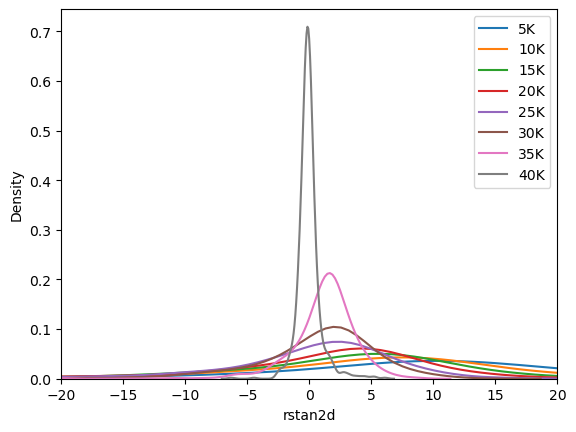

In [102]:
import seaborn as sns
marks = ["5K", "10K", "15K", "20K", "25K", "30K", "35K", "40K"]
for mark in marks:
    sns.kdeplot(test2[test2["dist"] == mark]["rstan2d"], label=mark)
plt.xlim(-20, 20)
plt.legend()

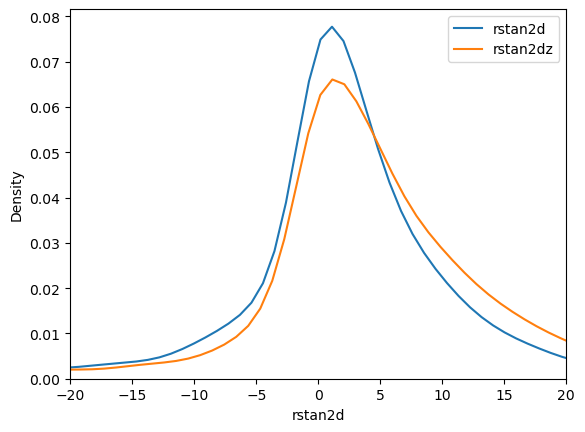

In [103]:
for m in model_info.keys():
    sns.kdeplot(test2[m], label=m)

plt.xlim(-20, 20)
plt.legend()

         extrap    rstan2d   rstan2dx   rstan2dy   rstan2dz
dist                                                       
5K    17.314686  15.879833  18.788925  18.664683  19.252400
10K   16.557909  12.449337  14.286624  14.248523  14.609903
15K   15.162284  10.466824  11.587129  11.519951  11.768843
20K   12.890271   8.464665   9.194310   9.153313   9.314241
25K   10.936394   6.942514   7.219077   7.196346   7.244384
30K    7.627967   5.069355   5.445438   5.407229   5.474964
35K    4.272465   3.295542   3.590617   3.560522   3.613471
40K    1.176863   0.979388   0.877455   0.909004   0.933497


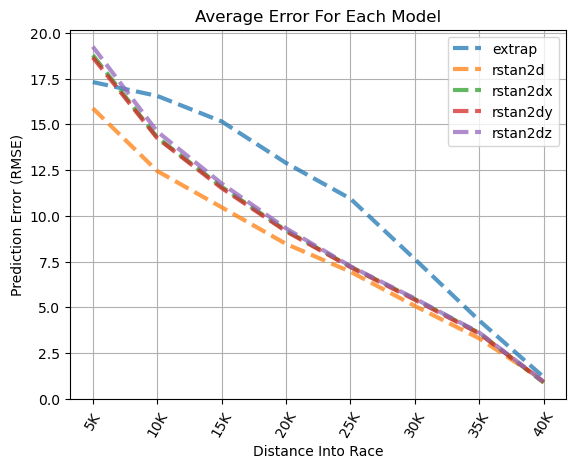

In [128]:
labels = ["extrap", "rstan2a", "rstan2b", "rstan2c", "rstan2d"]
labels = ["extrap", "rstan2d", "rstan2dx", "rstan2dy", "rstan2dz"]#"rstan3a", "rstan3b", "rstan3c", "rstan3d"]
# labels = ["extrap", "rstan2d2", "rstan2d4", "rstan2d5", "rstan2d3"]

colors = [f"C{i}" for i in range(len(labels))] # colors = ["C0", "C1", "C2", "C3", "C4"]
styles = '--'
mks = ["5K", "10K", "15K", "20K", "25K", "30K", "35K", "40K"]
table_group = test2.groupby(["dist"])[labels].apply(lambda x: (x ** 2).mean() ** 0.5).loc[mks]
print(table_group)
table_group.plot(label=table_group.columns,  style=styles, linewidth=3, grid=True, alpha=0.75, color=colors)

plt.xlabel("Distance Into Race")
plt.ylabel("Prediction Error (RMSE)")
plt.xticks(rotation=60)
plt.title("Average Error For Each Model")
plt.grid(True)
plt.legend()
# plt.savefig("analysis/all_errors3.png", bbox_inches="tight")

In [69]:
test2.groupby(["dist"])[labels].apply(lambda x: (x ** 2).sum()).loc[mks]
1 - (((test2[labels]) ** 2).sum()/((((42195/60) / test2["finish"]) - ((42195/60) / test2["finish"]).mean()) ** 2).sum()) # r squared

extrap     0.915491
rstan2d    0.947740
rstan3a    0.946392
rstan3b    0.947244
rstan3c    0.946516
dtype: float64

In [70]:
model_preds2 = {}

for k, v in model_info.items():
    print(k, v)
    preds = (42195 / 60) / get_preds(test, pd.read_csv(v[0]), feats_lis=v[1], beta_lis=v[2], propleft=v[3], full=True)
    model_preds2[k] = preds

rstan2d ('stan_results/rs_result2d.csv', ['total_pace', 'curr_pace', 'prop'], ['beta[1]', 'beta[2]', 'beta[3]'], True)
rstan3a ('stan_results/rs_result3a.csv', ['total_pace', 'curr_pace', 'prop', 'propxcurr'], ['beta[1]', 'beta[2]', 'beta[3]', 'beta[4]'], True)
rstan3b ('stan_results/rs_result3b.csv', ['total_pace', 'curr_pace', 'prop', 'propxcurr', 'male'], ['beta[1]', 'beta[2]', 'beta[3]', 'beta[4]', 'beta[5]'], True)
rstan3c ('stan_results/rs_result3c.csv', ['total_pace', 'curr_pace', 'prop', 'propxcurr', 'age'], ['beta[1]', 'beta[2]', 'beta[3]', 'beta[4]', 'beta[5]'], True)
rstan3d ('stan_results/rs_result3d.csv', ['total_pace', 'curr_pace', 'prop', 'propxcurr', 'male', 'age'], ['beta[1]', 'beta[2]', 'beta[3]', 'beta[4]', 'beta[5]', 'beta[6]'], True)


In [71]:
def add_intervals_to_test(data_tbl, pred_names):
    data = data_tbl.copy()
    for pred_name in pred_names:
        for conf, lower, upper in [(50, 25, 75), (80, 10, 90), (95, 2.5, 97.5)]:
            test_true = (42195 / 60) / data["finish"]
            b1, b2 = np.percentile(model_preds2[pred_name], [lower, upper], axis=1)
            data[f"{pred_name}-lower{conf}"] = b1
            data[f"{pred_name}-upper{conf}"] = b2
            data[f"{pred_name}-size{conf}"] = b2 - b1
            data[f"{pred_name}-in{conf}"] = (test_true < b2) & (test_true > b1)
    return data

In [73]:
pred_names = ["rstan2d", "rstan3a", "rstan3b", "rstan3c"]
table2 = add_intervals_to_test(test2, pred_names)
table2

,id,dist,curr_pace,total_pace,finish,age,gender,year,prop,propleft,...,rstan3c-size50,rstan3c-in50,rstan3c-lower80,rstan3c-upper80,rstan3c-size80,rstan3c-in80,rstan3c-lower95,rstan3c-upper95,rstan3c-size95,rstan3c-in95
28,286805,5K,5.154639,5.154639,5.018435,31,M,2023,0.118497,0.881503,...,9.241279,True,132.401588,149.803572,17.401984,True,128.650928,155.016534,26.365606,True
71,286848,5K,4.677268,4.677268,4.851115,29,F,2023,0.118497,0.881503,...,11.027723,False,146.506633,167.796079,21.289446,False,141.498777,174.499786,33.001009,True
85,286862,5K,4.897160,4.897160,4.806904,30,M,2023,0.118497,0.881503,...,9.972907,True,139.562237,158.518826,18.956589,True,135.442685,164.440632,28.997946,True
120,286897,5K,5.117707,5.117707,4.720855,41,M,2023,0.118497,0.881503,...,8.882768,False,133.657593,150.819814,17.162221,True,129.554600,156.121094,26.566493,True
125,286902,5K,4.616805,4.616805,4.707687,23,M,2023,0.118497,0.881503,...,11.211251,False,148.503804,169.934781,21.430977,True,143.377408,176.855301,33.477894,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208126,312707,40K,1.631321,1.960977,1.956008,27,F,2023,0.947980,0.052020,...,3.530952,True,356.549113,363.095064,6.545951,True,354.744017,365.044976,10.300958,True
208138,312719,40K,1.728310,1.967439,1.951665,56,F,2023,0.947980,0.052020,...,3.372784,False,355.199228,361.716926,6.517698,True,353.352141,363.312523,9.960381,True
208148,312729,40K,1.693193,1.959728,1.943664,60,M,2023,0.947980,0.052020,...,3.427621,True,356.981001,363.625082,6.644081,True,355.434635,365.460758,10.026124,True
208150,312731,40K,1.431434,1.968310,1.942322,64,M,2023,0.947980,0.052020,...,3.546345,True,359.908535,366.657695,6.749161,True,357.917912,368.506714,10.588802,True


/opt/anaconda3/envs/pyenv10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/opt/anaconda3/envs/pyenv10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/opt/anaconda3/envs/pyenv10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  r

,rstan2d-in50,rstan3a-in50,rstan3b-in50,rstan3c-in50,rstan2d-in80,rstan3a-in80,rstan3b-in80,rstan3c-in80,rstan2d-in95,rstan3a-in95,rstan3b-in95,rstan3c-in95
dist,,,,,,,,,,,,
5K,0.44125,0.45250,0.45000,0.45375,0.84750,0.84125,0.85250,0.84625,0.97500,0.97625,0.97375,0.97500
10K,0.52500,0.54375,0.56125,0.54375,0.90875,0.91625,0.91750,0.91625,0.98875,0.98500,0.98375,0.98500
15K,0.57000,0.59500,0.60250,0.59000,0.91625,0.93125,0.93250,0.93000,0.98000,0.98000,0.97875,0.97875
20K,0.57000,0.58750,0.60500,0.59125,0.91125,0.91000,0.91250,0.91000,0.97750,0.97625,0.97625,0.97625
25K,0.61375,0.61750,0.64250,0.63500,0.90000,0.90875,0.91000,0.90875,0.97250,0.97000,0.97125,0.97125
30K,0.56875,0.56125,0.58625,0.56875,0.89375,0.89750,0.90500,0.89875,0.97250,0.97500,0.97375,0.97250
35K,0.50250,0.48125,0.52750,0.48125,0.90750,0.90000,0.91375,0.90000,0.97625,0.97875,0.97625,0.98000
40K,0.71750,0.72375,0.63375,0.72750,0.91250,0.91125,0.89750,0.91125,0.97875,0.97875,0.97500,0.97500


<Figure size 4000x4000 with 0 Axes>

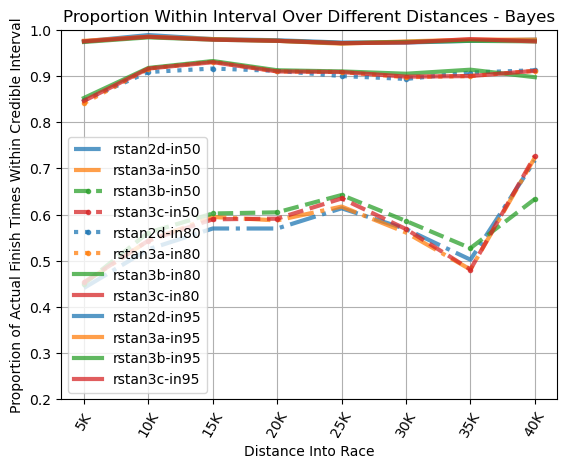

In [74]:
colors = [f"C{i}" for i in range(len(pred_names))] * 3
tables = []
for conf, style in [(50, "-."), (80, "--."), (95, ":.")]:
    sublabels = [f"{p}-in{conf}" for p in pred_names]
    table3 = table2.groupby(["dist"])[sublabels].apply(lambda x: np.sum(x) / len(x)).loc[mks]
    tables.append(table3)

plt.figure(figsize=(40, 40))
big_table = pd.concat(tables, axis=1)
big_table.plot(label=big_table.columns,  style=["-."] * 2 + ["--."] * 2 + [":."] * 2 , linewidth=3, grid=True, alpha=0.75, color=colors)
# plt.ylim(0.2, 1) 
plt.legend(loc="lower center")

plt.xlabel("Distance Into Race")
plt.ylabel("Proportion of Actual Finish Times Within Credible Interval")
plt.xticks(rotation=60)
plt.ylim(0.2, 1)
plt.title("Proportion Within Interval Over Different Distances - Bayes")
plt.grid(True)
plt.legend()
# plt.savefig("analysis/interval_check_bayes.png", bbox_inches="tight")
big_table

,rstan2d-size50,rstan3a-size50,rstan3b-size50,rstan3c-size50,rstan2d-size80,rstan3a-size80,rstan3b-size80,rstan3c-size80,rstan2d-size95,rstan3a-size95,rstan3b-size95,rstan3c-size95
dist,,,,,,,,,,,,
5K,26.876203,27.249062,27.162908,27.138498,51.568733,52.210632,52.118668,52.129471,80.421937,81.322872,81.159337,81.163740
10K,22.465290,22.660579,22.592575,22.606396,43.012487,43.362562,43.243479,43.252949,66.599899,67.146655,67.041745,66.897319
15K,18.634597,18.732090,18.678912,18.681835,35.594424,35.796011,35.642198,35.728322,54.906658,55.321076,54.986649,55.029589
20K,15.110090,15.217212,15.173881,15.183586,28.858281,29.023221,28.919300,28.959547,44.392234,44.647502,44.477591,44.534594
25K,11.646240,11.695693,11.642911,11.679409,22.165950,22.239106,22.186787,22.227692,33.990861,34.167684,34.018800,34.091984
30K,8.352370,8.358654,8.323128,8.337860,15.863488,15.894454,15.827091,15.834913,24.315105,24.366664,24.252378,24.256112
35K,4.951886,4.942017,4.927666,4.929751,9.422041,9.405854,9.372178,9.380406,14.410428,14.378701,14.324603,14.329276
40K,1.499245,1.486095,1.486593,1.481958,2.849202,2.822724,2.823694,2.819589,4.351015,4.311386,4.308980,4.310530


<Figure size 3000x2000 with 0 Axes>

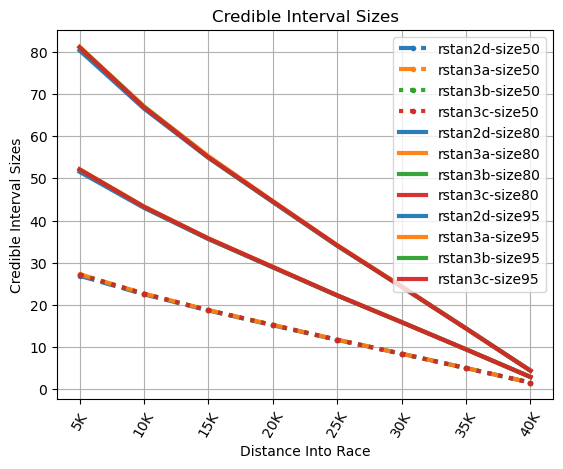

In [75]:
colors = [f"C{i}" for i in range(len(pred_names))] * 3
tables = []
for conf, style in [(50, "-."), (80, "--."), (95, ":.")]:
    sublabels = [f"{p}-size{conf}" for p in pred_names]
    table3 = table2.groupby(["dist"])[sublabels].apply(lambda x: (x ** 2).mean() ** 0.5).loc[mks]
    tables.append(table3)

plt.figure(figsize=(30, 20))
big_table = pd.concat(tables, axis=1)
big_table.plot(label=big_table.columns,  style= ["--."] * 2 + [":."] * 2 , linewidth=3, grid=True, alpha=0.95, color=colors)

plt.xlabel("Distance Into Race")
plt.ylabel("Credible Interval Sizes")
plt.xticks(rotation=60)
plt.title("Credible Interval Sizes")
plt.grid(True)
# plt.savefig("analysis/interval_sizes_bayes2.png", bbox_inches="tight")
big_table